In [ ]:
#importing all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importing dataset into notebook
df = pd.read_excel('/content/AssignmentData _ ElectricPe.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   StationID         22530 non-null  object        
 1   Station_Name      22530 non-null  object        
 2   Station_Type      22530 non-null  object        
 3   Station_Category  22530 non-null  object        
 4   Station_Access    22530 non-null  object        
 5   ChargerID         22530 non-null  object        
 6   Ping_Date         22530 non-null  datetime64[ns]
 7   hour0             22530 non-null  bool          
 8   hour1             22530 non-null  bool          
 9   hour2             22530 non-null  bool          
 10  hour3             22530 non-null  bool          
 11  hour4             22530 non-null  bool          
 12  hour5             22530 non-null  bool          
 13  hour6             22530 non-null  bool          
 14  hour7             2253

In [ ]:
df.isnull().sum()

StationID              0
Station_Name           0
Station_Type           0
Station_Category       0
Station_Access         0
ChargerID              0
Ping_Date              0
hour0                  0
hour1                  0
hour2                  0
hour3                  0
hour4                  0
hour5                  0
hour6                  0
hour7                  0
hour8                  0
hour9                  0
hour10                 0
hour11                 0
hour12                 0
hour13                 0
hour14                 0
hour15                 0
hour16                 0
hour17              3755
hour18              3755
hour19              3755
hour20              3755
hour21              3755
hour22              3755
hour23              3755
dtype: int64

In [ ]:
#dropping rows with NULL values.
df = df.dropna()

In [ ]:
df.describe()

,hour17,hour18,hour19,hour20,hour21,hour22,hour23
count,18775.000000,18775.000000,18775.000000,18775.000000,18775.000000,18775.000000,18775.000000
mean,0.814221,0.816192,0.815659,0.816138,0.815712,0.814913,0.811771
std,0.388939,0.387338,0.387772,0.387382,0.387729,0.388378,0.390905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#replacing TRUE with 1 and FALSE with 0
df = df.applymap(lambda x: int(1) if x == 1.0 or x == 0.0 else x)

#Task 1

In [ ]:
#finding unique values of each feature given.
target_columns = df.columns[2:5]
for column in target_columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'Station_Type': ['RESIDENTIAL']
Unique values for column 'Station_Category': ['SMALL' 'MEDIUM' 'APARTMENT' 'LARGE' 'RESIDENTIAL' 'INDEPENDENT_HOUSE'
 'OTHERS' 'L' 'INDEPENDENT' 'INDIVIDUAL_BUILDING' 'DIY']
Unique values for column 'Station_Access': ['PUBLIC' 'PRIVATE' 'RESTRICTED']


In [ ]:
#count of each station_category.
station_category_counts = df['Station_Category'].value_counts()
print(df['Station_Category'].value_counts())

SMALL                  6980
MEDIUM                 4605
RESIDENTIAL            3775
LARGE                  1255
APARTMENT              1170
INDEPENDENT_HOUSE       540
OTHERS                  425
DIY                      10
L                         5
INDEPENDENT               5
INDIVIDUAL_BUILDING       5
Name: Station_Category, dtype: int64


Station Count by Station Category

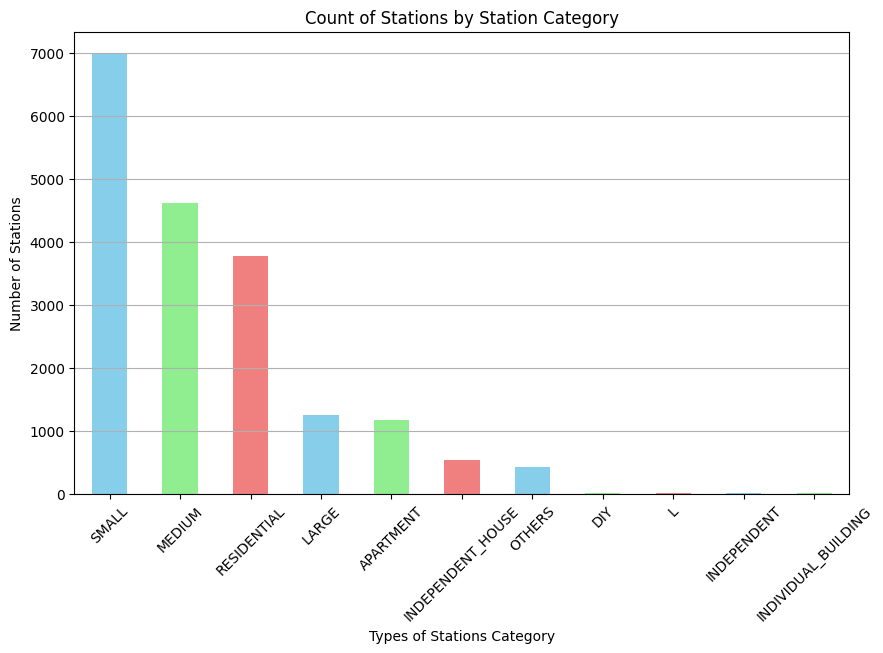

In [ ]:
plt.figure(figsize=(10, 6))
station_category_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Count of Stations by Station Category')
plt.xlabel('Types of Stations Category')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
#count of each station access.
station_access_counts = df['Station_Access'].value_counts()
print(station_access_counts)

PUBLIC        17750
PRIVATE         885
RESTRICTED      140
Name: Station_Access, dtype: int64


Station Count by Station Access

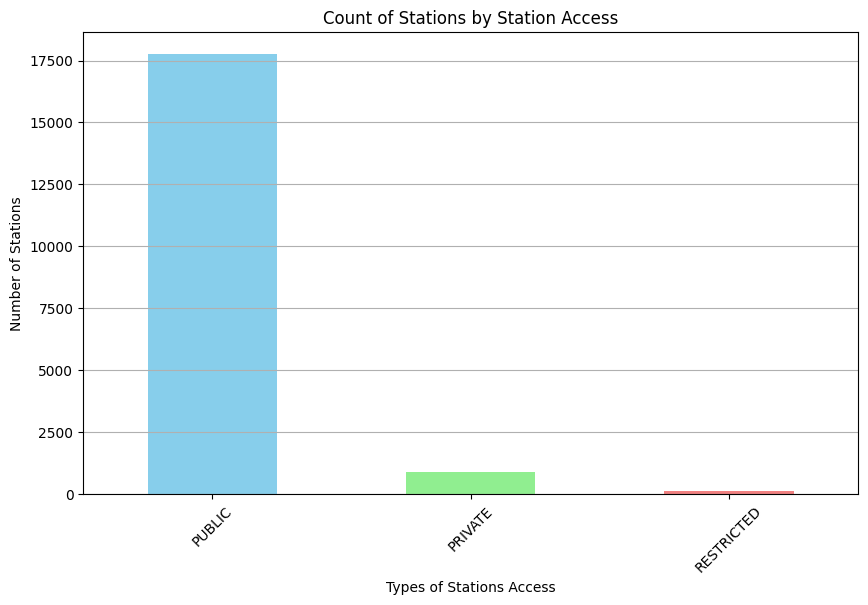

In [ ]:
plt.figure(figsize=(10, 6))
station_access_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Count of Stations by Station Access')
plt.xlabel('Types of Stations Access')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Digging Deep Into PUBLIC stations

In [ ]:
# Count of each public station category
public_stations = df[df['Station_Access'] == 'PUBLIC']
station_category_counts = public_stations['Station_Category'].value_counts()
print(station_category_counts)

SMALL                  6660
MEDIUM                 4390
RESIDENTIAL            3570
LARGE                  1190
APARTMENT              1050
INDEPENDENT_HOUSE       485
OTHERS                  385
L                         5
INDEPENDENT               5
INDIVIDUAL_BUILDING       5
DIY                       5
Name: Station_Category, dtype: int64


In [ ]:
#description of Public Stations.
df[df['Station_Access'] == 'PUBLIC'].describe()

,hour0,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,...,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23,total_hour
count,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,...,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,47.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,47.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,47.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,47.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,47.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,47.0


In [ ]:
df[df['Station_Access'] == 'PUBLIC'].describe()

,hour0,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,...,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23,total_hour
count,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,...,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0,17750.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,47.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,47.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,47.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,47.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,47.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,47.0


Hour vs No of stations uptime, Grouped by Station Categories

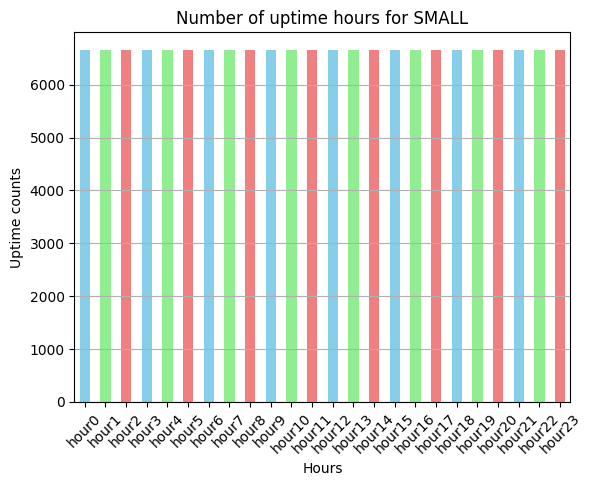

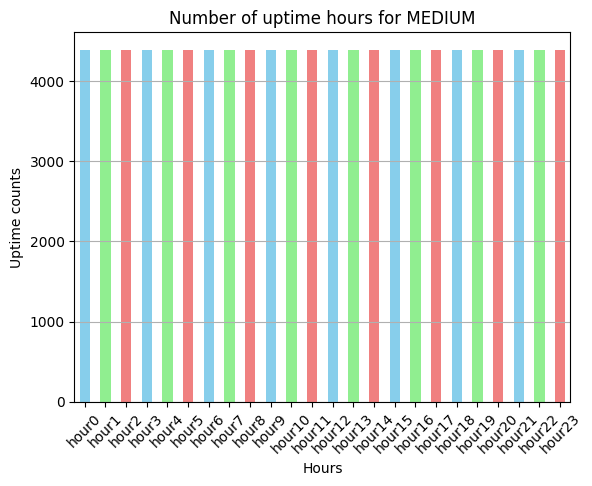

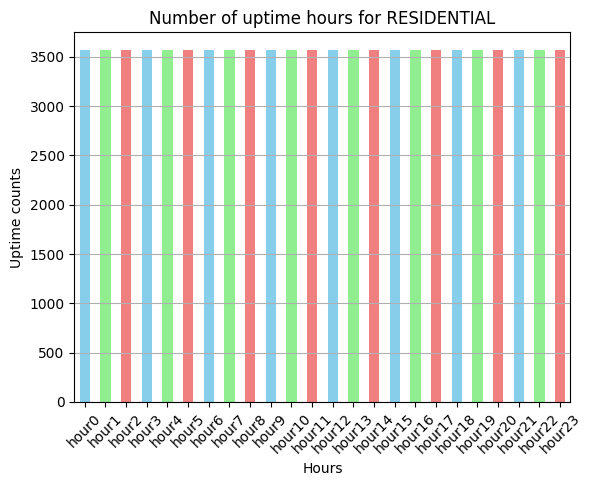

In [ ]:
target_categories = ['SMALL', 'MEDIUM', 'RESIDENTIAL']
for station_category in target_categories:
    category_stations = public_stations[public_stations['Station_Category'] == station_category]
    public_station_category_counts = category_stations.iloc[:, 6:31].sum(axis=0, numeric_only = True)
    public_station_category_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
    plt.title(f'Number of uptime hours for {station_category}')
    plt.xlabel('Hours')
    plt.ylabel('Uptime counts')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

Hour vs No of stations uptime, Grouped by Date

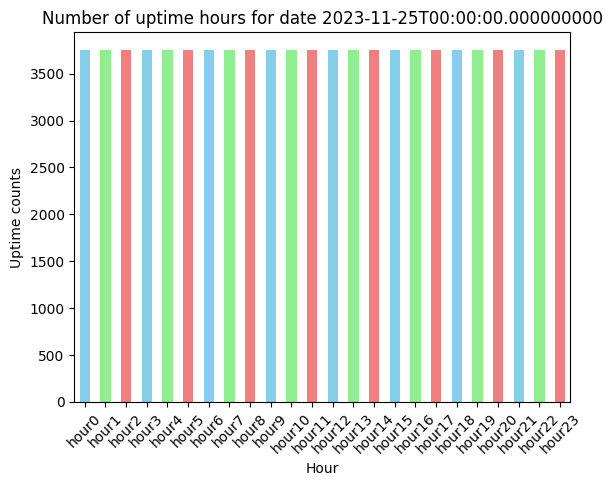

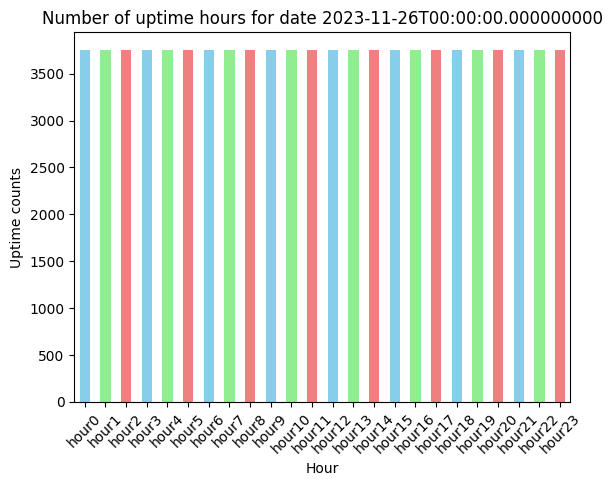

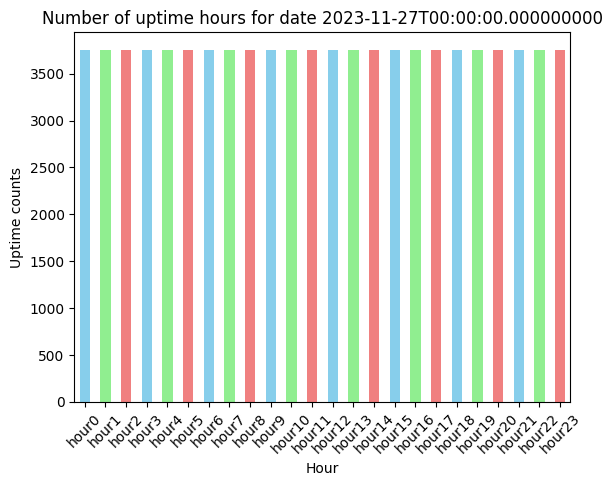

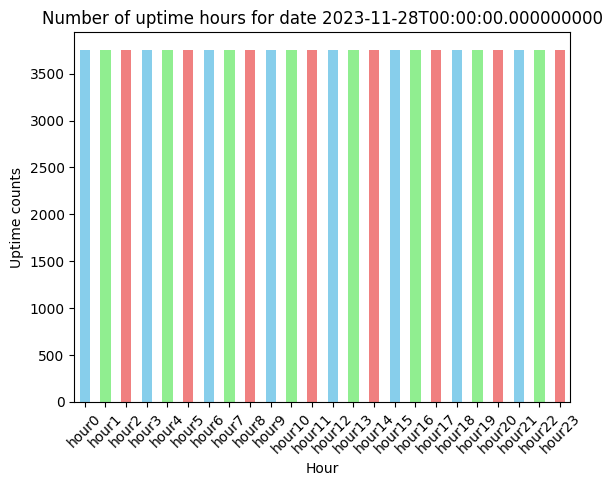

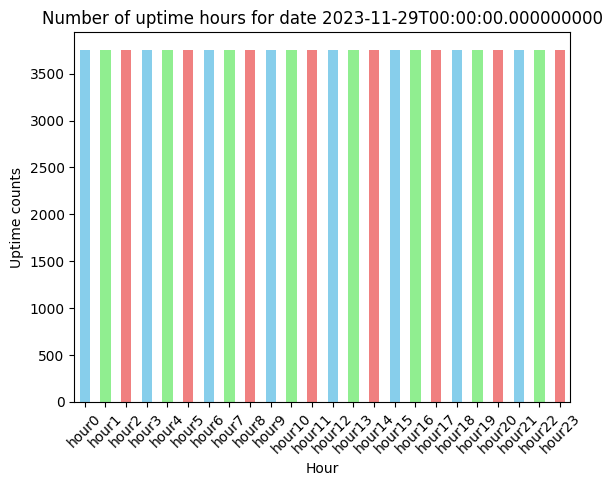

In [ ]:
dates = df['Ping_Date'].unique()

for date in dates:
    filtered_df = df[df['Ping_Date'] == date]

    # Now, you can plot the filtered data
    filtered_df.iloc[:,7:31].sum().plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
    plt.title(f'Number of uptime hours for date {date}')
    plt.xlabel('Hour')
    plt.ylabel('Uptime counts')
    plt.xticks(rotation=45)
#     plt.grid(axis='y')
    plt.show()

#Task 2

Outlier Analysis

In [ ]:
hours = df.columns[-24:]
df['total_hour'] = df[hours].sum(axis=1)

df_station_load = df.groupby('Station_Name')['total_hour'].sum()
print(df_station_load)

Station_Name
 Desai Radiant Developers         350
 UNIWORTH TRANQUIL APARTMENT     1750
# 48 7 HILLS REDENCY              350
#72 RESIDENCY                     350
10 X Apartment                    350
                                 ... 
happy homes palace Block C        350
shubh labh cypress                700
sri sai samrudhi                 1400
sudheer                           350
vinod Kumar_6662                  350
Name: total_hour, Length: 1892, dtype: int64


In [ ]:
# Calculate the total load for each station
hours = df.columns[-24:]
df['total_hour'] = df[hours].sum(axis=1)

# Calculate the total load for each station group by station name
df_station_load = df.groupby('Station_Name')['total_hour'].sum()

# Identify outliers using the IQR (Interquartile Range) method
q1 = df_station_load.quantile(0.25)
q3 = df_station_load.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df_station_load[(df_station_load < lower_bound) | (df_station_load > upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
Station_Name
 UNIWORTH TRANQUIL APARTMENT     2325
7 HILLS PARADISE                 1860
ADITHYA GARDEN                   2325
ANKURAA LOTUS                    3255
APARNA CYBER COMMUNE             5580
                                 ... 
Vedant Vayun-Apartments          4650
Veracious Vani Vilas             2790
Vrushabadri Towers               2325
WOOD STOCK                       1860
sri sai samrudhi                 1860
Name: total_hour, Length: 245, dtype: int64


245 Outliers have been identified

In [ ]:
# Find the station with the maximum total load
station_with_max_load = df_station_load.idxmax()
max_total_load = df_station_load.max()
station_with_min_load = df_station_load.idxmin()
min_total_load = df_station_load.min()

# Print the station with the maximum total load and its total load
print(f"Station with maximum total uptime: {station_with_max_load}")
print(f"Maximum total uptime: {max_total_load}")
print(f"Station with minimum total uptime: {station_with_min_load}")
print(f"Minimum total uptime: {min_total_load}")

Station with maximum total uptime: Salarpuria Anugraha
Maximum total uptime: 11625
Station with minimum total uptime:  Desai Radiant Developers
Minimum total uptime: 465


In [ ]:
#computing no of uptime hours for each Station Name.
df_nd = df.drop('Ping_Date',axis = 1)
df_grouped = df_nd.groupby(['StationID','Station_Name','Station_Category','Station_Access']).sum()

<ipython-input-50-e9363c1af8a9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_nd.groupby(['StationID','Station_Name','Station_Category','Station_Access']).sum()


In [ ]:
#drop hour columns
df_grouped = df_grouped.drop(columns=["hour0", "hour1", "hour2", "hour3", "hour4", "hour5", "hour6", "hour7", "hour8", "hour9", "hour10", "hour11", "hour12", "hour13", "hour14", "hour15", "hour16", "hour17", "hour18", "hour19", "hour20", "hour21", "hour22", "hour23"],axis = 1)

In [ ]:
# Sort the DataFrame by total_hour in descending order
df_grouped = df_grouped.sort_values(by='total_hour', ascending=False)
df_grouped.head()

,,,,total_hour
StationID,Station_Name,Station_Category,Station_Access,
42997455-b138-4108-ab1b-b207e0dcd416,Salarpuria Anugraha,RESIDENTIAL,PUBLIC,11625
badbd3e9-ffaf-47c5-87a5-7a8c8270f4e5,Sattva Park Cubix,RESIDENTIAL,PUBLIC,7440
623aeea2896e59f10634cbeb,SJR BLUE WATERS,RESIDENTIAL,PUBLIC,7440
923fa229-286a-4ba7-a24f-a486c13e0606,SOBHA DREAM ACRES PHASE 1,RESIDENTIAL,PUBLIC,6975
628b7230968b1a96e425c939,Krishna Kunj Gardens,LARGE,PUBLIC,6975


In [ ]:
# Sort the DataFrame by total_hour in ascending order
df_grouped = df_grouped.sort_values(by='total_hour', ascending=True)
df_grouped.head()

,,,,total_hour
StationID,Station_Name,Station_Category,Station_Access,
634177e0f44c2d250a0bfa42,DSR PRATHAMAM APARTMENT,SMALL,PUBLIC,465
61b65436896e59f10647ada7,Pradeep,INDEPENDENT_HOUSE,PUBLIC,465
61e6f864896e59f106dd9597,RAMESH KUMAR,INDEPENDENT_HOUSE,PUBLIC,465
61e6fac1896e59f106ddca8d,VENKATESH,INDEPENDENT_HOUSE,PUBLIC,465
61f0f5b5896e59f1069c82d9,Rohith R Raiker,INDEPENDENT_HOUSE,PUBLIC,465


So we can conclude that Station Category == SMALL or INDEPENDENT_HOUSE and Station Access == PUBLIC will give less number of total hour.
On the other hand we can say that Station Category == RESIDENTIAL and Access == PUBLIC will give very high number of total hour of usage